# Trust region methods

Trust region method define a region around the current guess in which the actual function is *trusted* to behave like some model function (to within some tolerance). They are designed to improve robustness for complex surfaces, including indefinate and ill-conditioned surfaces.

They are somewhat *dual* to line search:
* Line search: Choose a direction and search along the line for the next step.
* Trust region: Choose a step length (or limit) and then choose the direction.


The model function can be linear (based on the gradient at the current point) or quadratic (based on the gradient and the Hessian).

Algorithms differ by the criteria for updating the trust region, selection of the next guess, and what to do if the trust region fails.

(E.g.: If the new step deviates too far from the model, does one shrink the trust region for the *next step* or reject the current step and recalculat?).

#Comparison of optimization methods discussed *so far*

| **Category**       | **Optimization Technique**                | **Method Name**       |
|--------------------|-------------------------------------------|-----------------------|
| **Line Search**    | Broyden-Fletcher-Goldfarb-Shanno (BFGS)   | `BFGS`                |
|                    | Newton-Conjugate-Gradient                 | `Newton-CG`           |
|                    | Limited-memory BFGS                       | `L-BFGS-B`            |
|                    | Sequential Least Squares Programming      | `SLSQP`               |
| **Trust Region**   | Trust-Region Newton-Conjugate-Gradient    | `trust-ncg`           |
|                    | Trust-Region Truncated Generalized Lanczos| `trust-krylov`        |
|                    | Trust-Region Nearly Exact                 | `trust-exact`         |
| **Direct**         | Nelder-Mead Simplex                       | `Nelder-Mead`         |
|                    | Powell's Method                           | `Powell`              |
| **Gradient Descent**| Conjugate Gradient                       | `CG`                  |


#### Example - Compare optimizers

In [ ]:
def f(x):
       return (((x[0]**2+x[1]-11)**2) + (((x[0]+x[1]**2-7)**2)))

def grad_f(x):
  """Gradient of the function f."""
  x1, x2 = x
  df_dx1 = 4 * (x1**2 + x2 - 11) * x1 + 2 * (x1 + x2**2 - 7)
  df_dx2 = 2 * (x1**2 + x2 - 11) + 4 * (x1 + x2**2 - 7) * x2
  return np.array([df_dx1, df_dx2])

def hess_f(x):
  """Hessian of the function f."""
  x1, x2 = x
  d2f_dx1dx1 = 12 * x1**2 + 4 * x2 - 44 + 2
  d2f_dx1dx2 = 4 * x1 + 4 * x2
  d2f_dx2dx1 = 4 * x1 + 4 * x2
  d2f_dx2dx2 = 2 + 4 * x1 + 12 * x2**2 - 28
  return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])


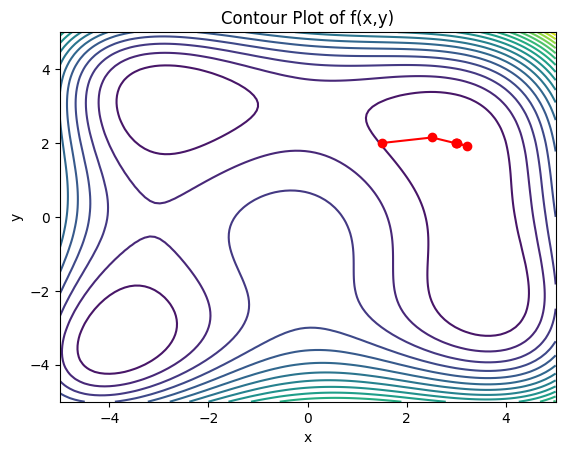

In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each point on the grid
Z = f([X, Y])

# Initial guess
x0 = np.array([1.5, 2])

guesses = [x0]
def callback(xk):
  guesses.append(xk)

# BFGS
# trust-ncg
# Newton-CG
# Nelder-Mead
# CG
# trust-exact
result = minimize(f, x0, method='trust-exact', jac=grad_f, hess = hess_f, callback=callback)

# Create a contour plot
plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x,y)')

# Plot the path of the guesses
x_guesses = [guess[0] for guess in guesses]
y_guesses = [guess[1] for guess in guesses]
plt.plot(x_guesses, y_guesses, marker='o', linestyle='-', color='red')

plt.show()